In [0]:
!pip install -q kaggle


In [0]:
a = [1]
while(1):
    a.extend(a)

In [0]:
from google.colab import files

In [0]:
!ls -lt




total 4
drwxr-xr-x 1 root root 4096 Jan 13 16:38 sample_data


In [0]:
cd /root/.kaggle

/root/.kaggle


In [0]:
cd /root/.kaggle

/root/.kaggle


In [0]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sanchitverma","key":"fa3c1ca57e830f7e0fb65bf7d367a29c"}'}

In [0]:
!ls -lt

total 1106876
-rw-r--r-- 1 root root        68 Jan 15 07:31 'kaggle (1).json'
-rw-r--r-- 1 root root  21725514 Jan 15 07:26  tag.csv
-rw-r--r-- 1 root root 690353377 Jan 15 07:26  rating.csv
-rw-r--r-- 1 root root   1493648 Jan 15 07:26  movie.csv
-rw-r--r-- 1 root root    539334 Jan 15 07:26  link.csv
-rw-r--r-- 1 root root     20363 Jan 15 07:26  genome_tags.csv
-rw-r--r-- 1 root root 214322450 Jan 15 07:26  genome_scores.csv
-rw-r--r-- 1 root root 204953792 Jan 15 07:26  movielens-20m-dataset.zip
-rw------- 1 root root        68 Jan 15 07:25  kaggle.json


In [0]:
!kaggle competitions download -c https://www.kaggle.com/grouplens/movielens-20m-dataset/download



404 - Not Found


In [0]:
! chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d grouplens/movielens-20m-dataset


movielens-20m-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV

import statsmodels.formula.api as smf


In [0]:
from zipfile import ZipFile

zipper = ZipFile( "movielens-20m-dataset.zip")
files = zipper.infolist()


with ZipFile( "movielens-20m-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/root/.kaggle")
  

In [0]:
ls -lt

In [0]:
tags = pd.read_csv( "tag.csv")
rating = pd.read_csv( "rating.csv")
movie = pd.read_csv( "movie.csv")



In [0]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [0]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
tags = tags.merge(rating, on ="movieId")


In [0]:
tags.head()

,userId,movieId,tag,timestamp,title,genres
0,18,4141,Mark Waters,2009-04-24 18:19:40,Head Over Heels (2001),Comedy|Romance
1,66193,4141,naive,2011-01-08 00:22:10,Head Over Heels (2001),Comedy|Romance
2,70201,4141,Mark Waters,2011-06-17 17:53:44,Head Over Heels (2001),Comedy|Romance
3,89274,4141,Freddie Prinze Jr.,2013-07-30 06:01:35,Head Over Heels (2001),Comedy|Romance
4,65,208,dark hero,2013-05-10 01:41:18,Waterworld (1995),Action|Adventure|Sci-Fi


In [0]:
link.tail()

,movieId,imdbId,tmdbId
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0
27277,131262,1724965,286971.0


In [0]:
ratings = pd.DataFrame(rating.groupby( "movieId").mean()["rating"])

In [0]:
ratings["rating"] = pd.Series(rating.rating.astype(float))

In [0]:
count_mId = rating.groupby('movieId').count()
mean_mId = rating.groupby("movieId").mean()
mean_mId

,userId,rating
movieId,,
1,69282.396821,3.921240
2,69169.928202,3.211977
3,69072.079388,3.151040
4,69652.913280,2.861393
5,69113.475454,3.064592
...,...,...
131254,79570.000000,4.000000
131256,79570.000000,4.000000
131258,28906.000000,2.500000


In [0]:
measure_index = pd.DataFrame(mean_mId.rating*count_mId.rating)
measure_index.head()

,rating
movieId,
1,194866.0
2,71444.0
3,40128.5
4,7886.0
5,37268.5


In [0]:
rating.head()

,userId,movieId,rating,timestamp,measure_index
0,1,2,3.5,2005-04-02 23:53:47,NaN
1,1,29,3.5,2005-04-02 23:31:16,194866.0
2,1,32,3.5,2005-04-02 23:33:39,71444.0
3,1,47,3.5,2005-04-02 23:32:07,40128.5
4,1,50,3.5,2005-04-02 23:29:40,7886.0


In [0]:
tags.sort_index()

,userId,tag,timestamp,title,genres
movieId,,,,,
1,55313,comedy,2011-11-08 20:38:36,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,28780,computer animation,2010-05-18 15:49:22,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,27898,animation,2012-09-26 08:32:49,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,27735,é˜®ä¸€é¸£,2006-03-22 13:57:33,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,27647,children,2013-01-18 23:20:50,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
131258,28906,pirates,2015-03-30 19:56:59,The Pirates (2014),Adventure
131258,28906,mutiny,2015-03-30 19:59:02,The Pirates (2014),Adventure
131258,28906,Korea,2015-03-30 19:58:32,The Pirates (2014),Adventure


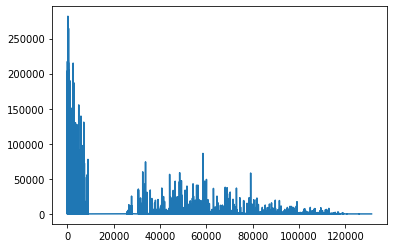

In [0]:
import matplotlib.pyplot as plt
plt.plot( measure_index ) 

In [0]:
tags = tags.groupby("movieId").count().sort_index()


In [0]:
tags.head()

,userId,tag,timestamp,title,genres
movieId,,,,,
1,436,436,436,436,436
2,123,123,123,123,123
3,18,18,18,18,18
4,6,6,6,6,6
5,22,22,22,22,22


In [0]:
tags = tags.merge(measure_index, on = "movieId")
tags.head()

,userId,tag,timestamp,title,genres,rating
movieId,,,,,,
1,436,436,436,436,436,194866.0
2,123,123,123,123,123,71444.0
3,18,18,18,18,18,40128.5
4,6,6,6,6,6,7886.0
5,22,22,22,22,22,37268.5


In [0]:
tags.columns = ["userId","tag","timestamp","title","genres","measure_index"]

In [0]:
tags.head()

,userId,tag,timestamp,title,genres,measure_index
movieId,,,,,,
1,436,436,436,436,436,194866.0
2,123,123,123,123,123,71444.0
3,18,18,18,18,18,40128.5
4,6,6,6,6,6,7886.0
5,22,22,22,22,22,37268.5


In [0]:
to_compare = tags.measure_index.sort_values(ascending = False)

In [0]:
to_compare = pd.DataFrame(to_compare)

In [0]:
to_compare.head()

,measure_index
movieId,
318,281788.0
296,280967.5
356,266607.0
593,264403.5
260,228400.0
